### check correction of pixc height data. 
1. geophysical correction;  
2. height reference correction.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import geopandas as gpd
from utils.functions import iter_IQR, pixc_geophy_cor


In [2]:
path_pixc = 'data/dianchi-lake/pixc/SWOT_L2_HR_PIXC_009_049_198L_20240105T211648_20240105T211659_PIC0_01_masked.nc'
path_raster = 'data/dianchi-lake/raster/SWOT_L2_HR_Raster_100m_UTM48R_N_x_x_x_009_049_099F_20240105T211638_20240105T211659_PIC0_01_masked.nc'
path_lake_vec = 'data/dianchi-lake/dianchi_vector.gpkg'
path_img = 'data/rsimg/dianchi_s2_20200511_wgs84.tif'


In [3]:
pixc_nc = xr.open_dataset(path_pixc)
raster_nc = xr.open_dataset(path_raster)
lake_gpd = gpd.read_file(path_lake_vec)
pixc_nc

<xarray.Dataset>
Dimensions:           (points: 285675)
Coordinates:
    latitude          (points) float64 ...
    longitude         (points) float64 ...
Dimensions without coordinates: points
Data variables:
    height            (points) float32 ...
    solid_earth_tide  (points) float32 ...
    pole_tide         (points) float32 ...
    load_tide_fes     (points) float32 ...
    iono_cor_gim_ka   (points) float32 ...
    geoid             (points) float32 ...
    pixel_area        (points) float32 ...
    geolocation_qual  (points) float64 ...
Attributes:
    description:                 cloud of geolocated interferogram pixels
    interferogram_size_azimuth:  3282
    interferogram_size_range:    5016
    looks_to_efflooks:           1.5534686421260762
    num_azimuth_looks:           7.0
    azimuth_offset:              9

In [4]:
### correction for pixc data
heights_cor = pixc_geophy_cor(pixc_nc=pixc_nc)
heights_cor = heights_cor - pixc_nc.geoid.values   ## to egm2008 height


In [5]:
## outliers removal
pixc_heights_cor_IQR, IQR = iter_IQR(arr=heights_cor, IQR_thre=0.5, iter_max=4)
raster_wse_IQR, IQR = iter_IQR(arr=raster_nc.wse.values, IQR_thre=0.5, iter_max=4)



In [6]:
# Calculate the extent of the raster_wgs84_nc using its coordinates
xmin, xmax = raster_nc.x.min().item(), raster_nc.x.max().item()
ymin, ymax = raster_nc.y.min().item(), raster_nc.y.max().item()
raster_extent = [xmin, xmax, ymin, ymax]
raster_extent


[102.59903234246654, 102.78372226038918, 24.66971022259297, 24.962372707916533]

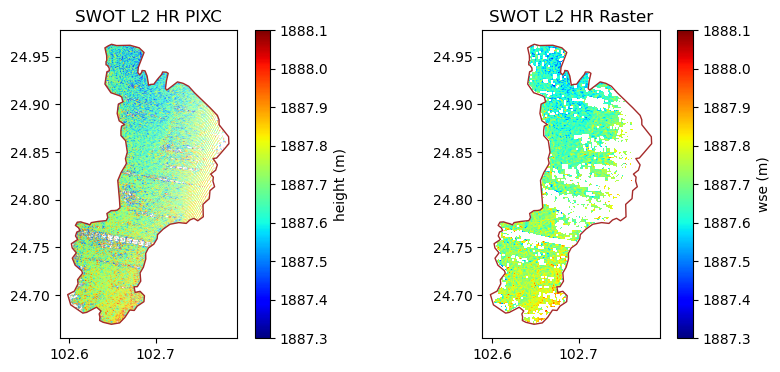

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
# ax1
scat1 = ax[0].scatter(x=pixc_nc.longitude, y=pixc_nc.latitude, c=pixc_heights_cor_IQR,
           s=0.1, edgecolor='none', cmap='jet', vmin=1887.3, vmax=1888.1)
lake_gpd.plot(ax=ax[0], edgecolor='Brown', facecolor='none', linewidth=1)
ax[0].set_title('SWOT L2 HR PIXC')
# ax2
im2 = ax[1].imshow(raster_wse_IQR, cmap='jet', extent=raster_extent, vmin=1887.3, vmax=1888.1)
lake_gpd.plot(ax=ax[1], edgecolor='Brown', facecolor='none', linewidth=1)
ax[1].set_title('SWOT L2 HR Raster')
fig.colorbar(scat1, ax=ax[0]).set_label('height (m)')
fig.colorbar(im2, ax=ax[1]).set_label('wse (m)')



In [8]:
pixc_height_IQR, IQR = iter_IQR(arr=pixc_nc.height.values, IQR_thre=0.5, iter_max=4)


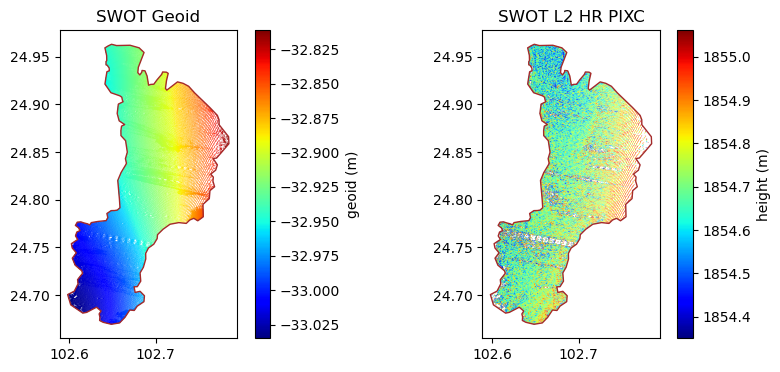

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
## ax1
scat1 = ax[0].scatter(x=pixc_nc.longitude, y=pixc_nc.latitude, c=pixc_nc.geoid,
           s=0.1, edgecolor='none', cmap='jet')
lake_gpd.plot(ax=ax[0], edgecolor='Brown', facecolor='none', linewidth=1)
ax[0].set_title('SWOT Geoid')
# ax2
scat2 = ax[1].scatter(x=pixc_nc.longitude, y=pixc_nc.latitude, c=pixc_height_IQR,
           s=0.1, edgecolor='none', cmap='jet')
lake_gpd.plot(ax=ax[1], edgecolor='Brown', facecolor='none', linewidth=1)
ax[1].set_title('SWOT L2 HR PIXC')
fig.colorbar(scat1, ax=ax[0]).set_label('geoid (m)')
fig.colorbar(scat2, ax=ax[1]).set_label('height (m)')

